In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


In [3]:
df=pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")


In [4]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [8]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df["species"].value_counts()


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: >

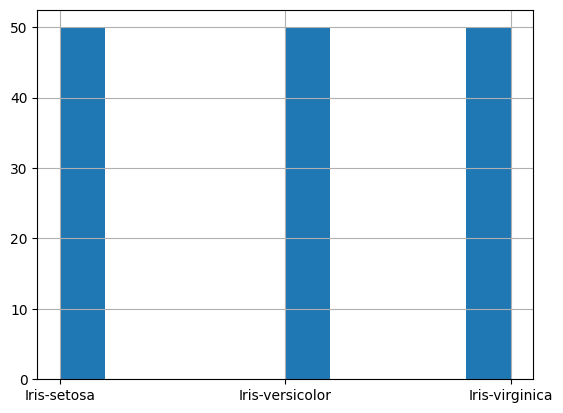

In [10]:
df["species"].hist()

In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
Setosa=df[df["species"].isin(["Iris-setosa"])]
Versicolour=df[df["species"].isin(["Iris-versicolor"])]
Virginica=df[df["species"].isin(["Iris-virginica"])]

Text(0.5, 1.0, 'classification of Setosa,Versicolour and Virginica according to petal_length and petal_width')

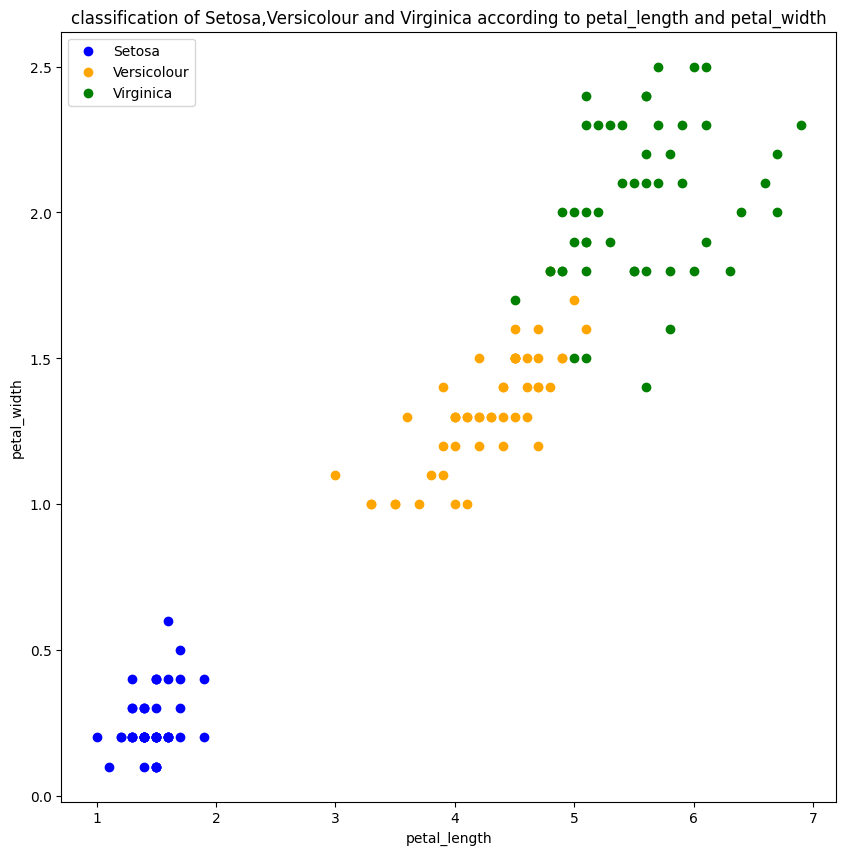

In [13]:
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(Setosa["petal_length"],Setosa["petal_width"],c="b",marker="o",label="Setosa")
ax.scatter(Versicolour["petal_length"],Versicolour["petal_width"],c="orange",marker="o",label="Versicolour")
ax.scatter(Virginica["petal_length"],Virginica["petal_width"],c="g",marker="o",label="Virginica")
leg=ax.legend()
ax.set_xlabel("petal_length")
ax.set_ylabel("petal_width")
ax.set_title("classification of Setosa,Versicolour and Virginica according to petal_length and petal_width")


In [14]:
le = LabelEncoder()
df['species']=le.fit_transform(df['species'])

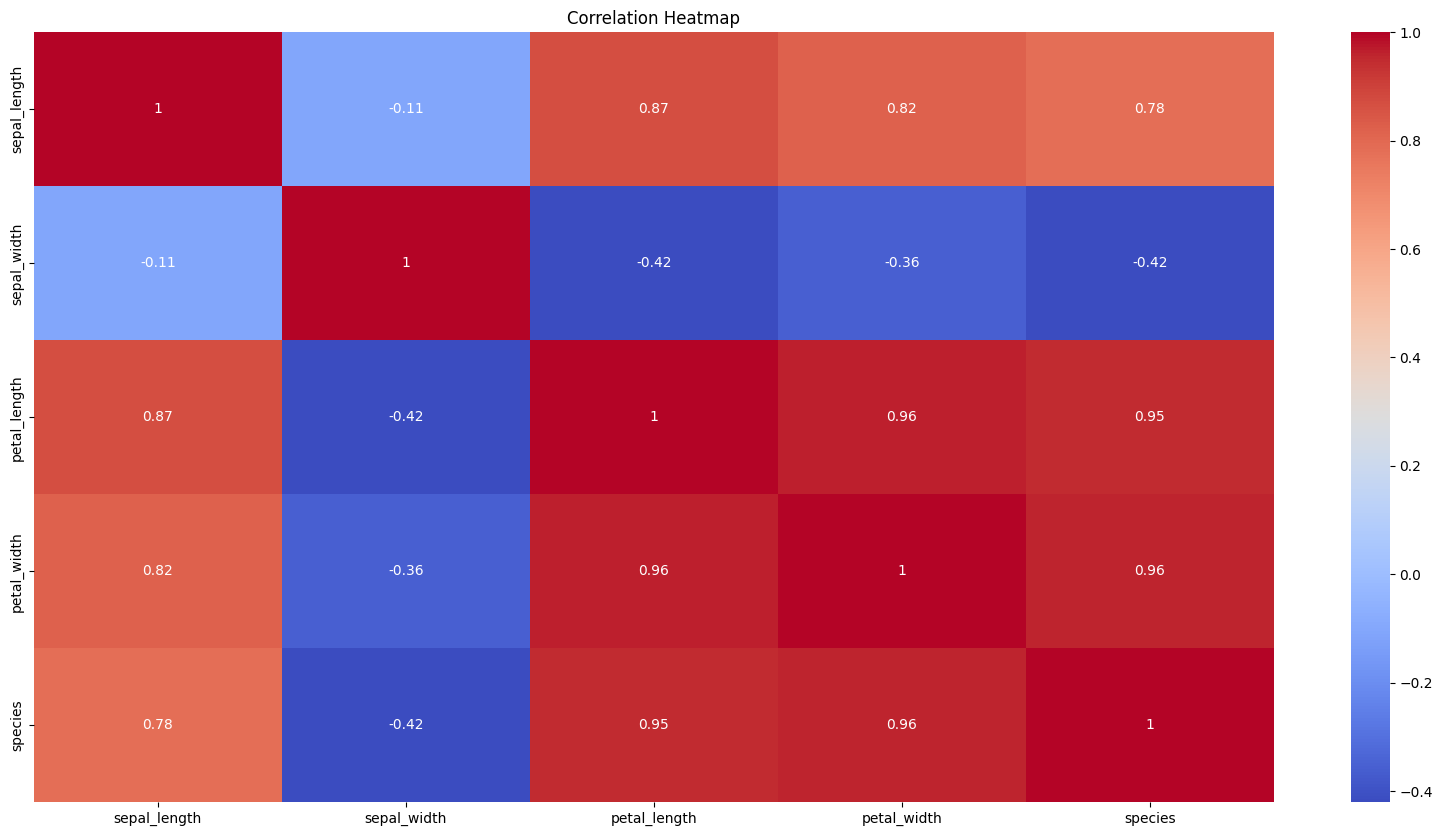

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
X=df.drop("species",axis=1)
y=df["species"]

In [17]:
Features=X.columns

In [18]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)


In [19]:
X=pd.DataFrame(X,columns=Features)


In [20]:
X.head()


,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [22]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [23]:
knn=KNeighborsClassifier(n_neighbors=15,algorithm="auto")
knn.fit(X_train,y_train)
print('KNNClassifierModel Train Score is : ' , knn.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , knn.score(X_test, y_test))
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

KNNClassifierModel Train Score is :  0.975
KNNClassifierModel Test Score is :  1.0
1.0


In [24]:
def plot_elbow_method(X_train, X_test, title, color='blue'):
    acc = []
    err = []
    ks = list(range(1, 100, 2))
    
    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k,algorithm="auto")
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        error = np.mean(y_pred != y_test)
        err.append(error)
        acc.append(accuracy)

    plt.figure()
    plt.title(title)
    plt.xlabel("Number of Ks")
    plt.ylabel("Error")
    plt.plot(ks, err, color=color)

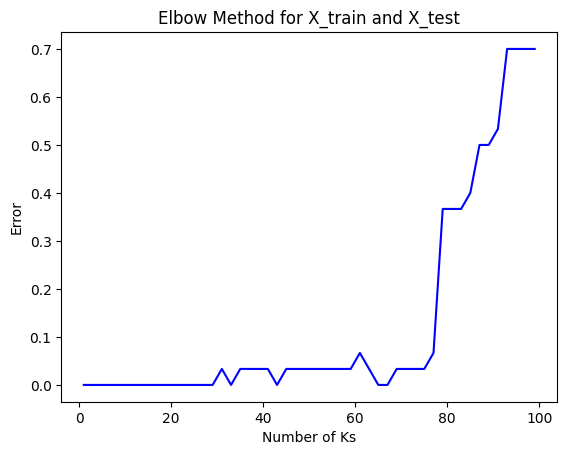

In [25]:
plot_elbow_method(X_train, X_test, "Elbow Method for X_train and X_test")

In [26]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [27]:
X_train_pca.shape,y_train.shape,X_test_pca.shape,y_test.shape

((120, 2), (120,), (30, 2), (30,))

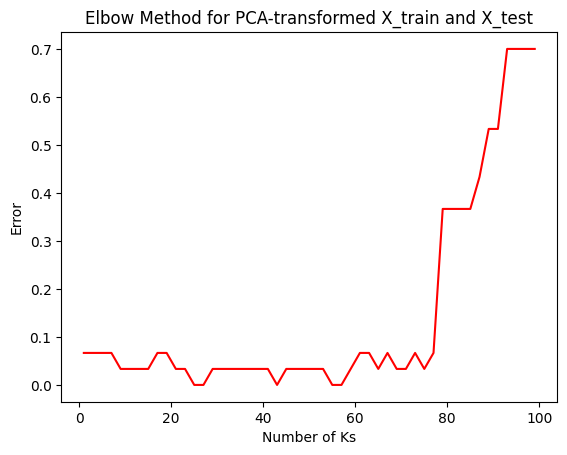

In [28]:
plot_elbow_method(X_train_pca, X_test_pca, "Elbow Method for PCA-transformed X_train and X_test", color='red')

In [29]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_pca,y_train)
print('KNNClassifierModel Train Score is : ' , knn.score(X_train_pca, y_train))
print('KNNClassifierModel Test Score is : ' , knn.score(X_test_pca, y_test))
y_pred = knn.predict(X_test_pca)
print(accuracy_score(y_test, y_pred))

KNNClassifierModel Train Score is :  0.9583333333333334
KNNClassifierModel Test Score is :  0.9666666666666667
0.9666666666666667


In [30]:
from collections import Counter
from sklearn.neighbors import KDTree

class KNN:
    def __init__(self, n_neighbors=5, algorithm='brute'): 
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.x_train = None
        self.y_train = None
        self.tree = None

    def fit(self, x_train, y_train):
        self.x_train = np.array(x_train)
        self.y_train = np.array(y_train)

        if self.algorithm == 'kd_tree':
            self.tree = KDTree(self.x_train)

    def predict(self, x_test):
        x_test = np.array(x_test)
        predictions = []

        for test_point in x_test:
            if self.algorithm == 'brute':
                distances = np.sqrt(np.sum((self.x_train - test_point)**2, axis=1))
                nearest_indices = distances.argsort()[:self.n_neighbors]
            elif self.algorithm == 'kd_tree':
                _, nearest_indices = self.tree.query([test_point], k=self.n_neighbors)

            nearest_labels = self.y_train[nearest_indices]
            most_common_label = Counter(nearest_labels).most_common(1)[0][0]
            predictions.append(most_common_label)

        return predictions

    def accuracy(self, x_test, y_test):
        predictions = self.predict(x_test)
        correct = sum(1 for pred, true in zip(predictions, y_test) if pred == true)
        return correct / len(y_test)


In [31]:
knn = KNN(n_neighbors=5, algorithm='brute')

 
knn.fit(X_train, y_train)

 
accuracy = knn.accuracy(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


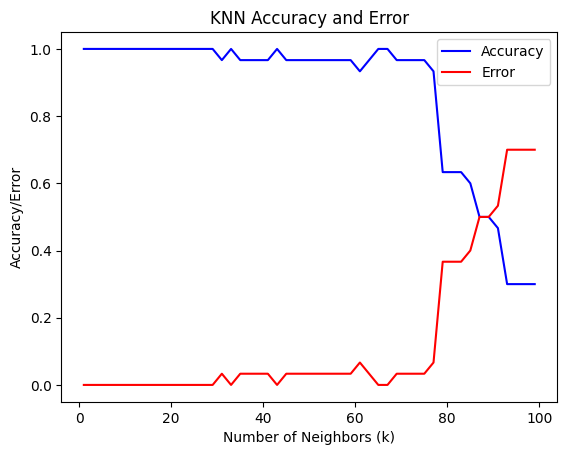

In [32]:
acc = []
err = []
ks = list(range(1, 100, 2))

for k in ks:
    knn = KNN(n_neighbors=k, algorithm='brute')  
    knn.fit(X_train, y_train)
    accuracy = knn.accuracy(X_test, y_test)
    error = 1 - accuracy
    acc.append(accuracy)
    err.append(error)

plt.figure()
plt.title("KNN Accuracy and Error")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy/Error")
plt.plot(ks, acc, label='Accuracy', color='blue')
plt.plot(ks, err, label='Error', color='red')
plt.legend()
plt.show()